In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['text.usetex'] = True

In [2]:
acc_unweighted = {'total': 69.45,
                  '(0,0)': 61.46,
                  '(1,1)': 70.40,
                  '(2,2)': 55.96,
                  '(0,1)': 69.96,
                  '(0,2)': 80.05,
                  '(1,2)': 75.84,
                  'max_diff': 27.06,
                  'var': 83.65}


acc_fairwalk = {'total': 69.17,
                '(0,0)': 62.65,
                '(0,1)': 70.62,
                '(0,2)': 75.55,
                '(1,1)': 69.72,
                '(1,2)': 73.44,
                '(2,2)': 57.29,
                'max_diff': 23.21,
                'var': 63.82}


#### alpha=0.5, p=2
acc_proposed =   {'total': 68.02,
                  '(0,0)': 60.45,
                  '(1,1)': 69.97,
                  '(2,2)': 60.05,
                  '(0,1)': 67.45,
                  '(0,2)': 68.91,
                  '(1,2)': 71.12,
                  'max_diff': 16.72,
                  'var': 42.79}




#### alpha=0.5, p=4
# acc_proposed =   {'total': 68.80,
#                   '(0,0)': 60.73,
#                   '(1,1)': 69.19,
#                   '(2,2)': 61.48,
#                   '(0,1)': 70.29,
#                   '(0,2)': 79.67,
#                   '(1,2)': 75.26,
#                   'max_diff': 23.70,
#                   'var': 67.67}


uw = np.array([0.0621, acc_unweighted['total'], acc_unweighted['var']])
alpha0_3_p_2 = np.array([ 0.0575, 68.99, 60.59])
alpha0_5_p_2 = np.array([ 0.0429, acc_proposed['total'], acc_proposed['var']])
alpha0_7_p_2 = np.array([ 0.0366, 68.96, 60.10])
rnd = np.array([0.0062, 50.19, 71.59])


red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [3]:
def get_bar_plot_all(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = ['A-A', 'B-B', 'C-C', 'A-B', 'A-C', 'B-C', 'Total']
    
    xu = [1- 3*bar_width, 1- 2*bar_width, 1 - bar_width, 1, 1 + bar_width, 1 + 2*bar_width, 1 + 3*bar_width]
    xp = [5 - 3*bar_width, 5 - 2*bar_width, 5 - bar_width, 5, 5 + bar_width, 5 + 2*bar_width, 5 + 3*bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], acc_unweighted['total'], bar_width, color = green_, edgecolor='black')
    ax.bar(xp[0], acc_proposed['total'], bar_width, color = blue_, edgecolor='black')
    
    ax.bar(xu[1], acc_unweighted['(1,1)'], bar_width, color = green_, hatch='//', edgecolor='black')
    ax.bar(xp[1], acc_proposed['(1,1)'], bar_width, color = blue_, hatch='//', edgecolor='black')
        
    ax.bar(xu[2], acc_unweighted['(0,0)'], bar_width, color = green_, hatch='\\\\', edgecolor='black')
    ax.bar(xp[2], acc_proposed['(0,0)'], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
    ax.bar(xu[3], acc_unweighted['(2,2)'], bar_width, color = green_, hatch='--', edgecolor='black')
    ax.bar(xp[3], acc_proposed['(2,2)'], bar_width, color = blue_, hatch='--', edgecolor='black')
    
    ax.bar(xu[4], acc_unweighted['(0,1)'], bar_width, color = green_, hatch='++', edgecolor='black')
    ax.bar(xp[4], acc_proposed['(0,1)'], bar_width, color = blue_, hatch='++', edgecolor='black')
    
    ax.bar(xu[5], acc_unweighted['(1,2)'], bar_width, color = green_, hatch='**', edgecolor='black')
    ax.bar(xp[5], acc_proposed['(1,2)'], bar_width, color = blue_, hatch='**', edgecolor='black')
    
    ax.bar(xu[6], acc_unweighted['(0,2)'], bar_width, color = green_, hatch='xx', edgecolor='black')
    ax.bar(xp[6], acc_proposed['(0,2)'], bar_width, color = blue_, hatch='xx', edgecolor='black')
    
    
    ax.bar(xu[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
    ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='A-A', edgecolor='black')
    ax.bar(xu[2], 0, bar_width, color = gray_, hatch='\\\\', label='B-B', edgecolor='black')
    ax.bar(xu[3], 0, bar_width, color = gray_, hatch='--', label='C-C', edgecolor='black')
    ax.bar(xu[4], 0, bar_width, color = gray_, hatch='++', label='A-B', edgecolor='black')
    ax.bar(xu[5], 0, bar_width, color = gray_, hatch='**', label='A-C', edgecolor='black')
    ax.bar(xu[6], 0, bar_width, color = gray_, hatch='xx', label='B-C', edgecolor='black')

    plt.legend(loc='upper left', prop={'size': legend_size}) #'upper left')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([1, 6], [' ', ' '])
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    
    fig.savefig('fig/link_prediction_twitter/twitter-bar_all.pdf',bbox_inches='tight')
    

In [4]:
def get_bar_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2]
    xf = [5.5 - bar_width, 5.5]
    xp = [9 - bar_width, 9]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], acc_unweighted['total'], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(xf[0], acc_fairwalk['total'], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], acc_proposed['total'], bar_width, color = purple_, edgecolor='black')
    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')
    ax.bar(xu[1], acc_unweighted['var'], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xf[1], acc_fairwalk['var'], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], acc_proposed['var'], bar_width, color = yellow_, edgecolor='black')


#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 5.5, 9], ['DeepWalk', 'FairWalk', 'SocialWalk'], fontsize=legend_size)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
        
    
    fig.savefig('fig/link_prediction_twitter/twitter-bar.pdf',bbox_inches='tight')

In [5]:
def get_mmd_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2, 2 + bar_width]
    x0_3 = [6 - bar_width, 6, 6 + bar_width]
    x0_5 = [10 - bar_width, 10, 10 + bar_width]
    x0_7 = [14 - bar_width, 14, 14 + bar_width]
    xr = [18 - bar_width, 18, 18 + bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], 1000 * uw[0], bar_width, color = green_, edgecolor='black', label='MMD ✕ 1000')
    ax.bar(x0_3[0], 1000 * alpha0_3_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_5[0], 1000 * alpha0_5_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_7[0], 1000 * alpha0_7_p_2[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xr[0], 1000 * rnd[0], bar_width, color = green_, edgecolor='black')

    
    ax.bar(xu[1], uw[1], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(x0_3[1], alpha0_3_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_5[1], alpha0_5_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_7[1], alpha0_7_p_2[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(xr[1], rnd[1], bar_width, color = purple_, edgecolor='black')

    ax.bar(xu[2], uw[2], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(x0_3[2], alpha0_3_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_5[2], alpha0_5_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_7[2], alpha0_7_p_2[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xr[2], rnd[2], bar_width, color = yellow_, edgecolor='black')

    
#     ax.bar(xu[1], acc_unweighted['max_diff'], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], acc_proposed['max_diff'], bar_width, color = blue_, hatch='//', edgecolor='black')



#     ax.bar(xu[0], 0, bar_width, color = gray_, label='Total Accuracy', edgecolor='black')
#     ax.bar(xu[1], 0, bar_width, color = gray_, hatch='//', label='Discrepancy', edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    #custom_lines = [Line2D([0], [0], color=green_, lw=3),
    #                Line2D([0], [0], color=blue_, lw=3)]
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
    #legend1 = plt.legend(custom_lines, ['DeepWalk', 'FairWalk'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='upper right',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    ax.set_ylim(ylim)
     
    
    
#     ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
    plt.xticks([2, 6, 10, 14, 18], ['DeepWalk', 'SocialWalk\nα=0.3, p=2', 'SocialWalk\nα=0.5, p=2', 'SocialWalk\nα=0.7, p=2', 'Random\nEmbedding'], fontsize = 18)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
        
    fig.savefig('fig/link_prediction_twitter/twitter-mmd.pdf',bbox_inches='tight')

In [6]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(8,.015))
    custom_lines = [
            Line2D([0], [0], color='green', lw=3), 
            Line2D([0], [0], color='blue', lw=3)]
    legend1 = plt.legend(custom_lines, ['Deepwalk + Logistic regression', 'Reweighting + Deepwalk + Logistic regression'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/link_prediction_twitter/legend.pdf', bbox_inches='tight')

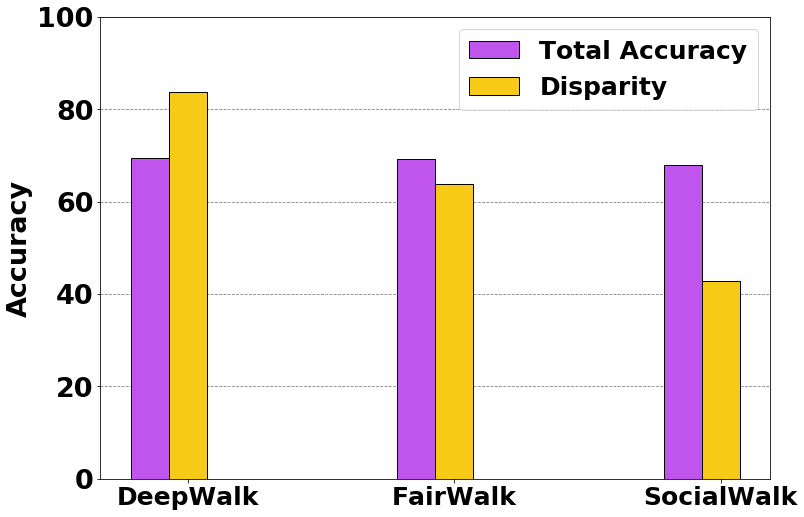

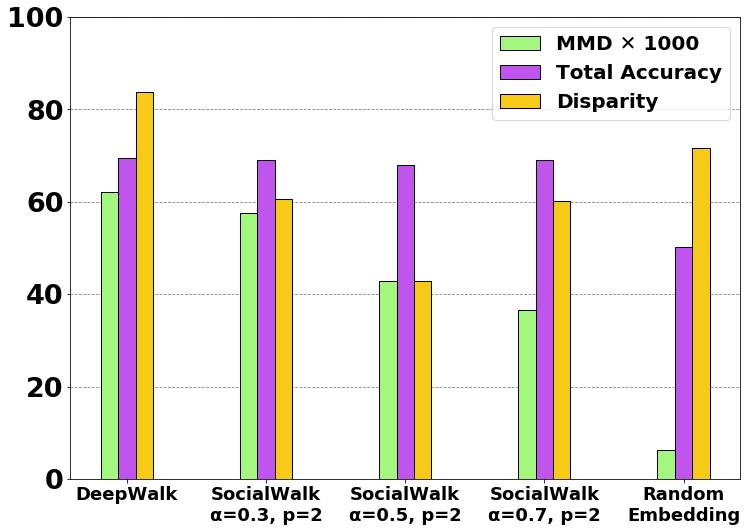

In [7]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 24
image_size = (12, 8.5)
line_width = 3
bar_width = 0.5

y_lim = [0, 100]
get_bar_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=25)

y_lim = [0, 100]
get_mmd_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=20)